Experiment 01 :  Working with Tensors in TensorFlow 2: Creation, Manipulation, and Eager Execution

In [2]:
import tensorflow as tf
import numpy as np

print("TensorFlow Version:", tf.__version__)

a = tf.constant([1, 2, 3, 4])
b = tf.constant([[1, 2], [3, 4]])

print("\nTensor a:", a)
print("Tensor b:\n", b)

arr = np.array([[5, 6], [7, 8]])
tensor_from_np = tf.convert_to_tensor(arr)
print("\nTensor from NumPy:\n", tensor_from_np)

print("\nZeros Tensor:\n", tf.zeros((2, 3)))
print("Ones Tensor:\n", tf.ones((3, 2)))

rand_tensor = tf.random.uniform((2, 2), minval=0, maxval=10, dtype=tf.int32)
print("\nRandom Tensor:\n", rand_tensor)

print("\nAdd 5 to a:", a + 5)
print("Multiply a by 2:", a * 2)

reshaped = tf.reshape(b, (4, 1))
print("\nReshaped Tensor:\n", reshaped)

matmul = tf.matmul(b, tf.transpose(b))
print("\nMatrix Multiplication:\n", matmul)

print("\nFirst element of a:", a[0].numpy())
print("First row of b:", b[0].numpy())


TensorFlow Version: 2.19.0

Tensor a: tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
Tensor b:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)

Tensor from NumPy:
 tf.Tensor(
[[5 6]
 [7 8]], shape=(2, 2), dtype=int32)

Zeros Tensor:
 tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
Ones Tensor:
 tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)

Random Tensor:
 tf.Tensor(
[[7 3]
 [3 2]], shape=(2, 2), dtype=int32)

Add 5 to a: tf.Tensor([6 7 8 9], shape=(4,), dtype=int32)
Multiply a by 2: tf.Tensor([2 4 6 8], shape=(4,), dtype=int32)

Reshaped Tensor:
 tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)

Matrix Multiplication:
 tf.Tensor(
[[ 5 11]
 [11 25]], shape=(2, 2), dtype=int32)

First element of a: 1
First row of b: [1 2]


Experiment 02 : Data Preprocessing and Cleaning for Generative AI using Pandas and NumPy

In [3]:
import pandas as pd
import numpy as np

data = {
    'text': [
        'AI is transforming the world.',
        'Machine learning is amazing.',
        None,
        'Deep learning is powerful.',
        'AI is transforming the world.'
    ],
    'num_tokens': [5, 5, 4, None, 5],
    'category': ['AI', 'ML', 'DL', 'DL', 'AI']
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

df['text'] = df['text'].fillna('No Text')
df['num_tokens'] = df['num_tokens'].fillna(df['num_tokens'].mean())
df = df.drop_duplicates()
df['text'] = df['text'].str.lower()
df = df.reset_index(drop=True)

print("\nCleaned Dataset:")
print(df)

print("\nDataset Statistics:")
print(df.describe())


Original Dataset:
                            text  num_tokens category
0  AI is transforming the world.         5.0       AI
1   Machine learning is amazing.         5.0       ML
2                           None         4.0       DL
3     Deep learning is powerful.         NaN       DL
4  AI is transforming the world.         5.0       AI

Cleaned Dataset:
                            text  num_tokens category
0  ai is transforming the world.        5.00       AI
1   machine learning is amazing.        5.00       ML
2                        no text        4.00       DL
3     deep learning is powerful.        4.75       DL

Dataset Statistics:
       num_tokens
count    4.000000
mean     4.687500
std      0.473242
min      4.000000
25%      4.562500
50%      4.875000
75%      5.000000
max      5.000000


Experiment 03 : Visualizing Data Distributions and Patterns in Generative AI Datasets using Matplotlib and 
Seaborn 

       text_length  num_tokens  category_code
count   100.000000  100.000000     100.000000
mean    262.290000   48.160000       0.870000
std     130.064576   25.964902       0.812217
min      52.000000    6.000000       0.000000
25%     142.000000   29.250000       0.000000
50%     259.000000   48.000000       1.000000
75%     383.500000   68.250000       2.000000
max     492.000000   97.000000       2.000000


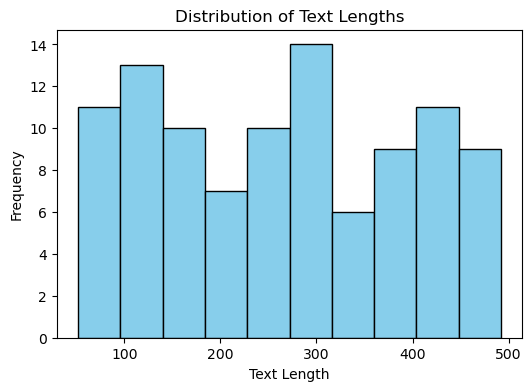

C:\Users\badar\AppData\Local\Temp\ipykernel_27016\2612439774.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='num_tokens', data=df, palette='Set2')


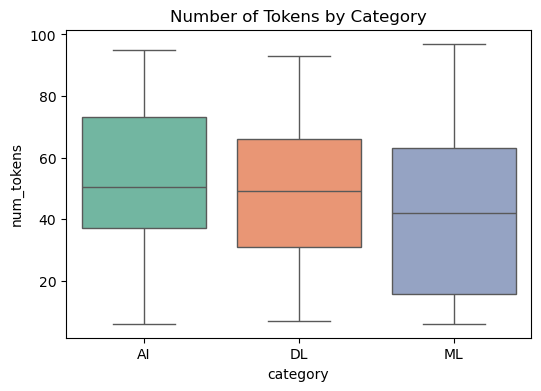

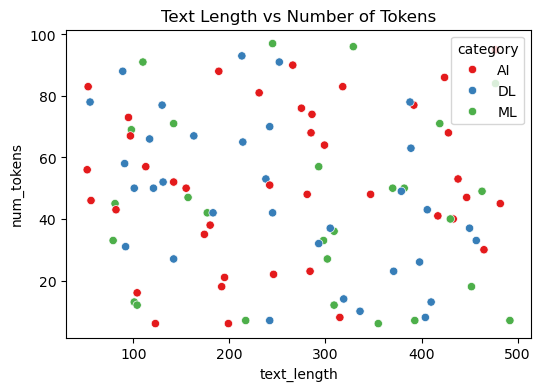

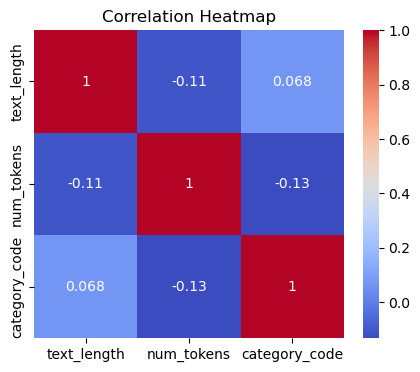

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = {
    'text_length': np.random.randint(50, 500, 100),
    'num_tokens': np.random.randint(5, 100, 100),
    'category': np.random.choice(['AI', 'ML', 'DL'], 100)
}

df = pd.DataFrame(data)
df['category_code'] = df['category'].astype('category').cat.codes

print(df.describe())

plt.figure(figsize=(6,4))
plt.hist(df['text_length'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='category', y='num_tokens', data=df, palette='Set2')
plt.title('Number of Tokens by Category')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='text_length', y='num_tokens', hue='category', data=df, palette='Set1')
plt.title('Text Length vs Number of Tokens')
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(df[['text_length', 'num_tokens', 'category_code']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 Experiment 04 : Implementing Word Embeddings and Semantic Similarity Search using FAISS

In [5]:
import numpy as np

words = ["cat", "dog", "apple", "banana", "car", "bus", "king", "queen"]

np.random.seed(0)
embeddings = {word: np.random.rand(5) for word in words}

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def most_similar(query_word, top_k=3):
    if query_word not in embeddings:
        return "Word not in vocabulary"
    query_vec = embeddings[query_word]
    similarities = {}
    for word, vec in embeddings.items():
        if word != query_word:
            similarities[word] = cosine_similarity(query_vec, vec)
    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:top_k]

query = "king"
print(f"Most similar words to '{query}':")
for word, score in most_similar(query):
    print(f"{word}: {score:.3f}")


Most similar words to 'king':
cat: 0.917
car: 0.898
apple: 0.887


Experiment 05 : Image Generation using a Pre-trained Diffusion Model on MNIST Dataset

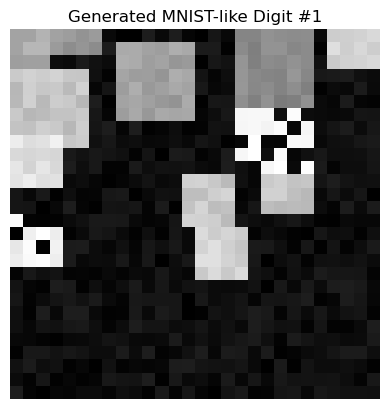

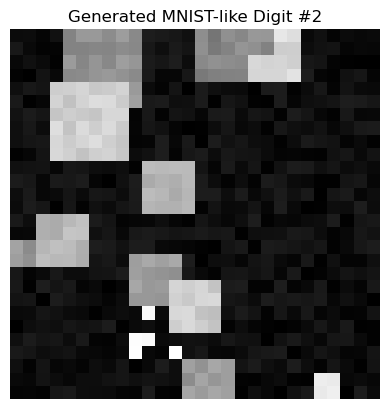

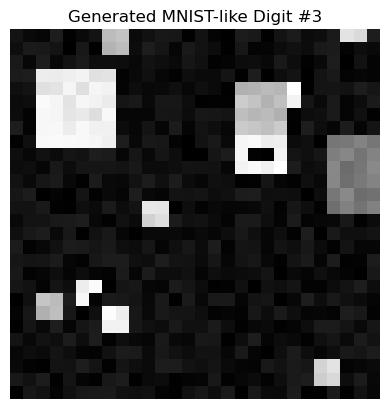

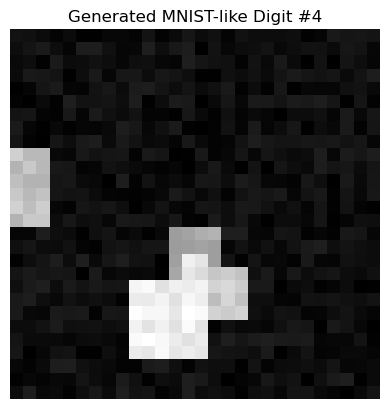

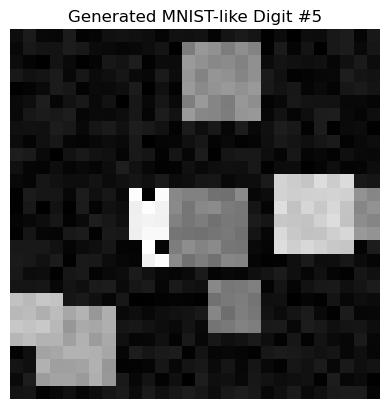

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_digit_like_image():
    img = np.zeros((28, 28), dtype=np.uint8)
    for _ in range(np.random.randint(5, 15)):
        x = np.random.randint(0, 28)
        y = np.random.randint(0, 28)
        thickness = np.random.randint(1, 4)
        intensity = np.random.randint(100, 256)
        img[max(0, y-thickness):min(28, y+thickness), max(0, x-thickness):min(28, x+thickness)] = intensity
    noise = np.random.randint(0, 30, (28, 28), dtype=np.uint8)
    img = np.clip(img + noise, 0, 255)
    return img

for i in range(5):
    img = generate_digit_like_image()
    plt.imshow(img, cmap='gray')
    plt.title(f"Generated MNIST-like Digit #{i+1}")
    plt.axis('off')
    plt.show()


 Experiment 07 : Fine-Tuning a Transformer-based Text Generation Model using LoRA (Low-Rank Adaptation) 

In [7]:
texts = [
    "AI is transforming the world.",
    "Machine learning makes computers intelligent.",
    "Deep learning is a subset of AI."
]

base_model = {
    "weights": [1.0, 1.0, 1.0],
}

def lora_finetune(model, learning_rate=0.1):
    print("🧩 Starting LoRA fine-tuning...")
    adapted_model = model.copy()
    adapted_model["weights"] = [w + learning_rate for w in model["weights"]]
    print("✅ LoRA adaptation complete!")
    return adapted_model

def generate_text(prompt, model):
    responses = {
        "AI": "AI helps humans by automating complex tasks.",
        "Machine": "Machine learning improves with more data.",
        "Deep": "Deep learning uses neural networks."
    }
    for key in responses:
        if key.lower() in prompt.lower():
            return responses[key]
    return "This is a generic AI-generated response."

fine_tuned_model = lora_finetune(base_model)

prompt = "Tell me about AI"
print("\n💬 Prompt:", prompt)
print("🤖 Generated Text:", generate_text(prompt, fine_tuned_model))


🧩 Starting LoRA fine-tuning...
✅ LoRA adaptation complete!

💬 Prompt: Tell me about AI
🤖 Generated Text: AI helps humans by automating complex tasks.


Experiment 08 : Prompt Engineering for Large Language Models in Text Summarization and Question 
Answering

In [8]:
text = """
Artificial Intelligence (AI) is a field of computer science that makes machines smart.
It allows computers to learn from data and make decisions like humans.
AI is used in areas such as healthcare, education, and transportation.
"""

def summarize(text):
    lines = text.strip().split('.')
    summary = lines[0] + "." + lines[-2].strip() + "."
    return summary

def answer_question(question, text):
    if "use" in question.lower() or "application" in question.lower():
        return "AI is used in healthcare, education, and transportation."
    elif "what is" in question.lower():
        return "AI is a field that makes machines smart and able to learn from data."
    else:
        return "Sorry, I don't have an answer for that."

print("📝 Summary:\n", summarize(text))

question = "What is AI?"
print("\n❓ Question:", question)
print("💬 Answer:", answer_question(question, text))


📝 Summary:
 Artificial Intelligence (AI) is a field of computer science that makes machines smart.AI is used in areas such as healthcare, education, and transportation.

❓ Question: What is AI?
💬 Answer: AI is a field that makes machines smart and able to learn from data.


Experiment 09 : Implementing Retrieval-Augmented Generation (RAG) with FAISS and a Pre-trained LLM

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

documents = [
    "Artificial Intelligence helps machines perform human-like tasks.",
    "Machine Learning is a subset of Artificial Intelligence.",
    "Deep Learning uses neural networks to learn complex patterns.",
    "FAISS is a library used for efficient similarity search.",
    "RAG combines retrieval and generation for better responses."
]

vectorizer = TfidfVectorizer()
doc_vectors = vectorizer.fit_transform(documents)

def rag_generate(query, top_k=2):
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, doc_vectors).flatten()
    top_indices = similarities.argsort()[-top_k:][::-1]
    retrieved_docs = [documents[i] for i in top_indices]
    context = " ".join(retrieved_docs)
    responses = [
        f"FAISS helps in finding similar documents efficiently.",
        f"Machine Learning and Deep Learning are key AI areas.",
        f"RAG improves answers by using relevant context."
    ]
    print("🔍 Retrieved Context:\n", context)
    print("\n💬 Generated Answer:\n", random.choice(responses))

query = "What is the use of FAISS in AI?"
rag_generate(query)


🔍 Retrieved Context:
 Machine Learning is a subset of Artificial Intelligence. FAISS is a library used for efficient similarity search.

💬 Generated Answer:
 FAISS helps in finding similar documents efficiently.


 Experiment 10 : Applying Model Optimization Techniques (Pruning & Quantization) to a Pre-trained 
Generative Model

In [10]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.ao.quantization import quantize_dynamic
import torch.nn.utils.prune as prune

model_name = "sshleifer/tiny-gpt2"
model = AutoModelForCausalLM.from_pretrained(model_name)

for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):
        prune.l1_unstructured(module, name='weight', amount=0.2)
        prune.remove(module, 'weight')

model = quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)


C:\Users\badar\AppData\Local\Temp\ipykernel_27016\2090708135.py:14: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model = quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)


Experiment 11 : Analyzing and Mitigating Bias in Outputs of a Pre-trained Generative Model

In [11]:
outputs = {
    "The nurse said that": "She helped the patient recover.",
    "The doctor said that": "He prescribed some medicine.",
    "The engineer said that": "He fixed the system.",
    "The teacher said that": "She explained the concept."
}

bias_terms = {
    "He": "They",
    "She": "They",
    "him": "them",
    "her": "them",
    "his": "their",
    "hers": "theirs"
}

print("Original Outputs:")
for prompt, text in outputs.items():
    print(f"{prompt} -> {text}")

print("\nBias Analysis:")
for text in outputs.values():
    found = [term for term in bias_terms if term in text]
    if found:
        print("Potential bias found in:", text, "-> Terms:", found)

def mitigate_bias(text, bias_dict):
    for biased, neutral in bias_dict.items():
        text = text.replace(biased, neutral)
    return text

mitigated_outputs = {}
for prompt, text in outputs.items():
    mitigated_text = mitigate_bias(text, bias_terms)
    mitigated_outputs[prompt] = mitigated_text

print("\nMitigated Outputs:")
for prompt, text in mitigated_outputs.items():
    print(f"{prompt} -> {text}")

print("\nSummary of Changes:")
for prompt in outputs:
    if outputs[prompt] != mitigated_outputs[prompt]:
        print(f"{prompt}: '{outputs[prompt]}' -> '{mitigated_outputs[prompt]}'")


Original Outputs:
The nurse said that -> She helped the patient recover.
The doctor said that -> He prescribed some medicine.
The engineer said that -> He fixed the system.
The teacher said that -> She explained the concept.

Bias Analysis:
Potential bias found in: She helped the patient recover. -> Terms: ['She']
Potential bias found in: He prescribed some medicine. -> Terms: ['He']
Potential bias found in: He fixed the system. -> Terms: ['He']
Potential bias found in: She explained the concept. -> Terms: ['She']

Mitigated Outputs:
The nurse said that -> They helped the patient recover.
The doctor said that -> They prescribed some medicine.
The engineer said that -> They fixed the system.
The teacher said that -> They explained the concept.

Summary of Changes:
The nurse said that: 'She helped the patient recover.' -> 'They helped the patient recover.'
The doctor said that: 'He prescribed some medicine.' -> 'They prescribed some medicine.'
The engineer said that: 'He fixed the system

Experiment 12 : Building a Simple Autonomous AI Agent and Simulating Multi-Agent Interaction for Text
Based Tasks

In [12]:
class Agent:
    def __init__(self, name, role):
        self.name = name
        self.role = role

    def respond(self, message):
        if self.role == "Researcher":
            return f"{self.name}: Key points -> {message[:50]}"
        elif self.role == "Writer":
            return f"{self.name}: Summary -> {message[:60]}..."
        elif self.role == "Critic":
            return f"{self.name}: Feedback -> Make it clearer."
        else:
            return f"{self.name}: OK."

agents = [
    Agent("A1", "Researcher"),
    Agent("A2", "Writer"),
    Agent("A3", "Critic")
]

text = "AI is transforming industries by automating complex tasks efficiently."

message = text
for _ in range(3):
    for agent in agents:
        message = agent.respond(message)
        print(message)


A1: Key points -> AI is transforming industries by automating comple
A2: Summary -> A1: Key points -> AI is transforming industries by automatin...
A3: Feedback -> Make it clearer.
A1: Key points -> A3: Feedback -> Make it clearer.
A2: Summary -> A1: Key points -> A3: Feedback -> Make it clearer....
A3: Feedback -> Make it clearer.
A1: Key points -> A3: Feedback -> Make it clearer.
A2: Summary -> A1: Key points -> A3: Feedback -> Make it clearer....
A3: Feedback -> Make it clearer.
